### Regression Analysis - 
### Perform EDA and build a model for Housing Price Prediction
1. Perform data cleaning
2. Deal with missing and duplicate values
3. Perform Exploratory data analysis
4. Explain which factors influence cost of medical insurance
5. Perform data preprocessing
6. Select best features for training the model (Feature engineering)
7. Train the model using several regression models and find the best model suitable for the problem
8. Use hyperparameter tuning to find best parameters for the algorithm
9. Evaluate the model using various evaluation metrics


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# reading the dataset
data = pd.read_csv('kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
# getting basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.isnull().sum()                       # checking for null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.duplicated().sum()                  # checking for duplicate values

0

In [6]:
data.nunique()                          # checking for no.of unique values in each column

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

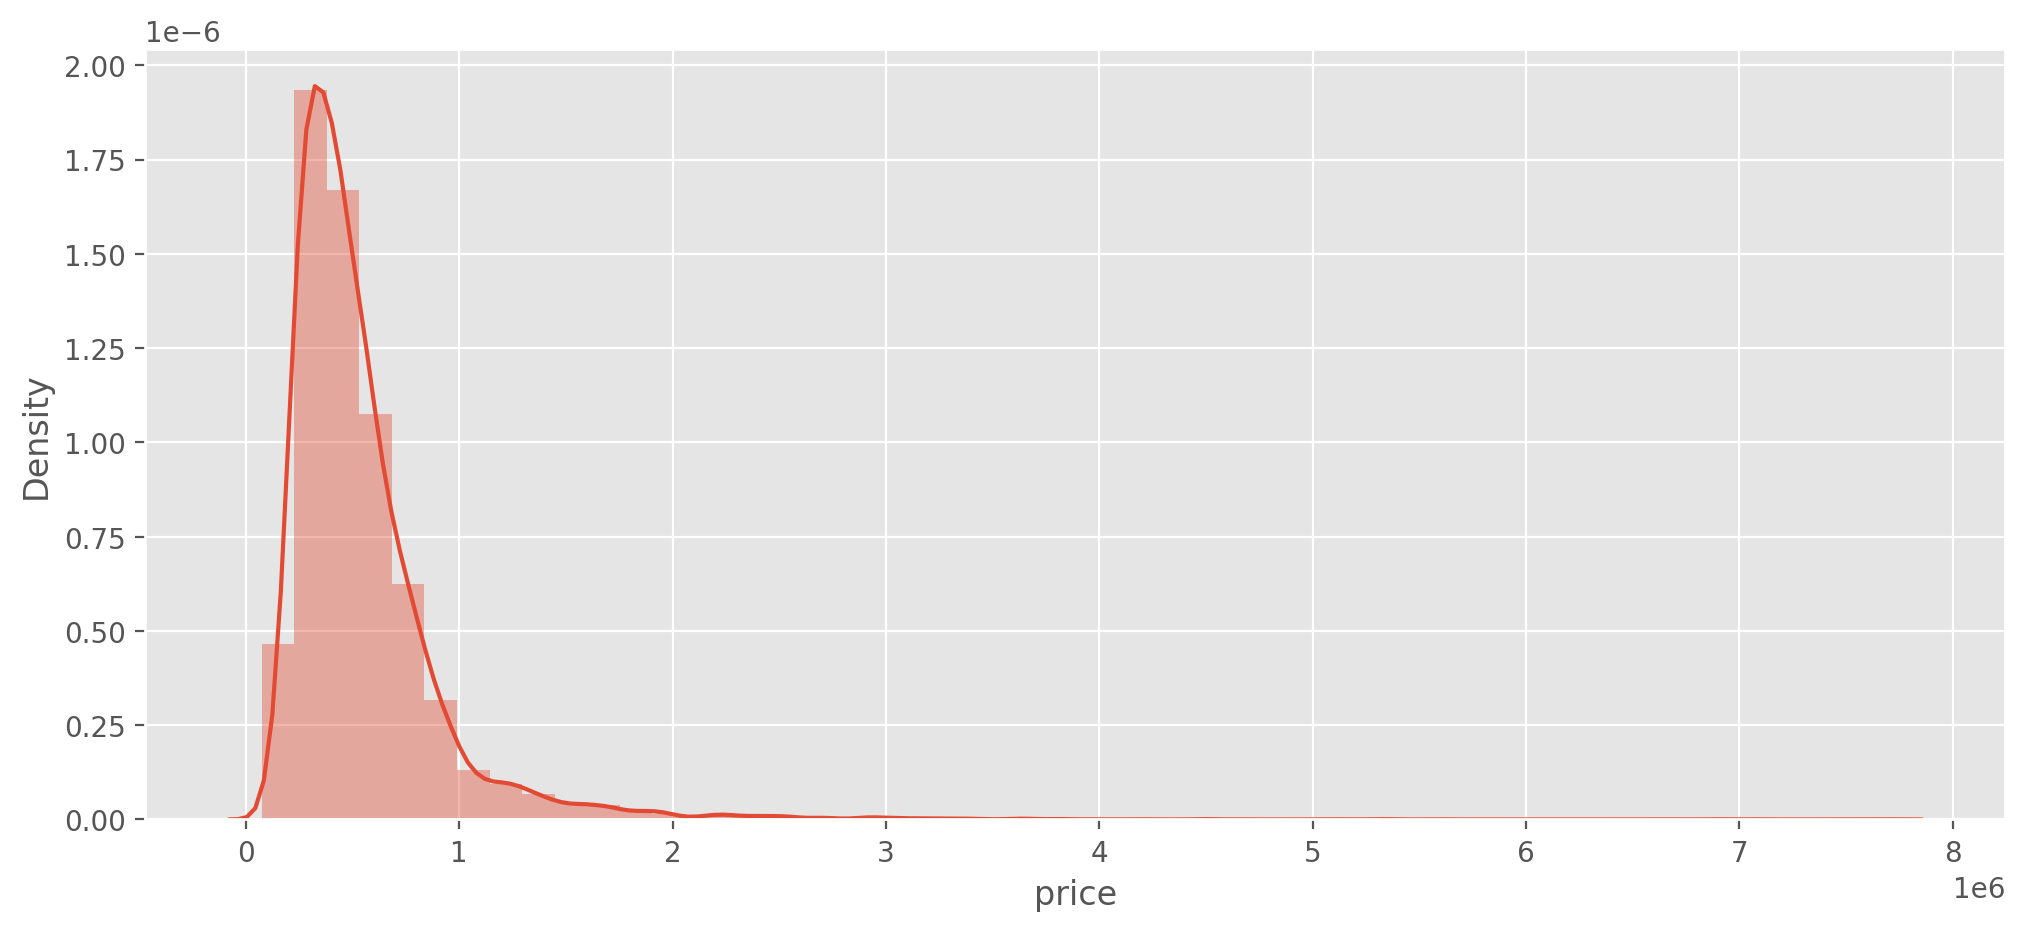

In [7]:
plt.figure(figsize=(12,5),dpi=200)
sns.distplot(data.price)

In [8]:
x=data.price.count()
y=data["price"][data.price<=1000000].count()
y

20148

In [9]:
print("Percentage of houses with cost less than 1cr : ",y/x*100)

Percentage of houses with cost less than 1cr :  93.22167214176653


<AxesSubplot:xlabel='price', ylabel='bedrooms'>

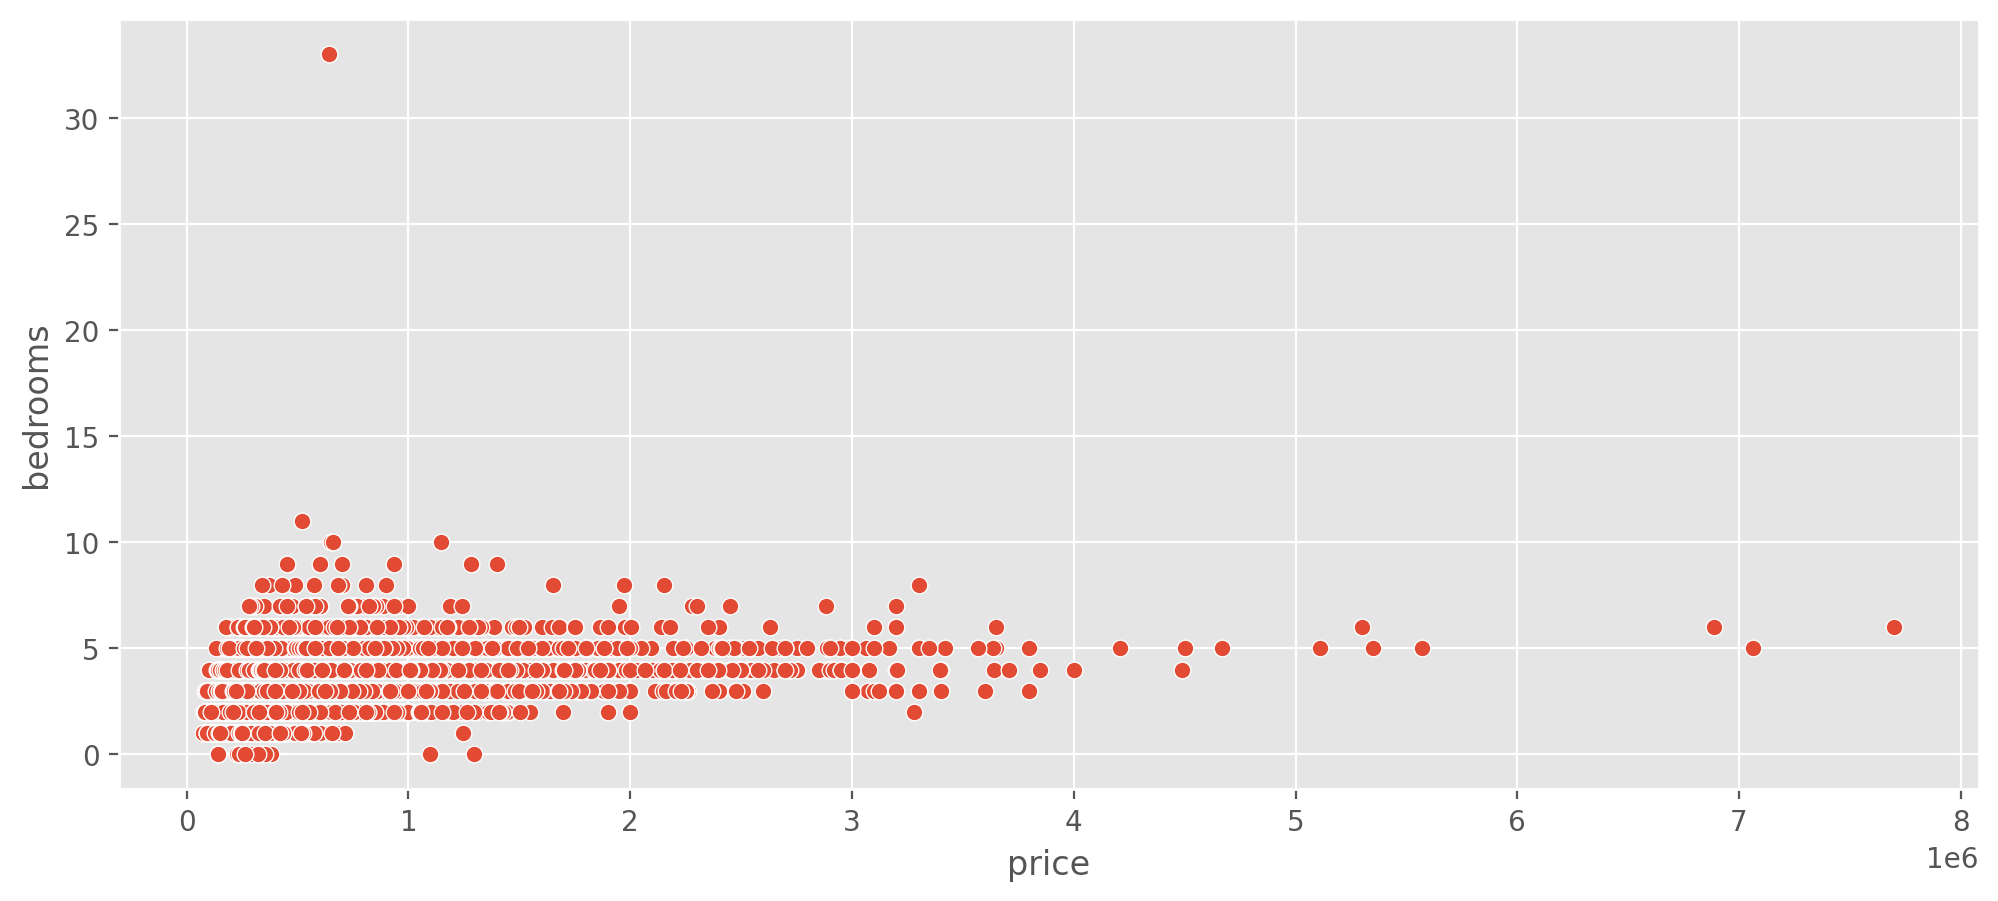

In [10]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data.price,data.bedrooms)

<AxesSubplot:xlabel='price', ylabel='bathrooms'>

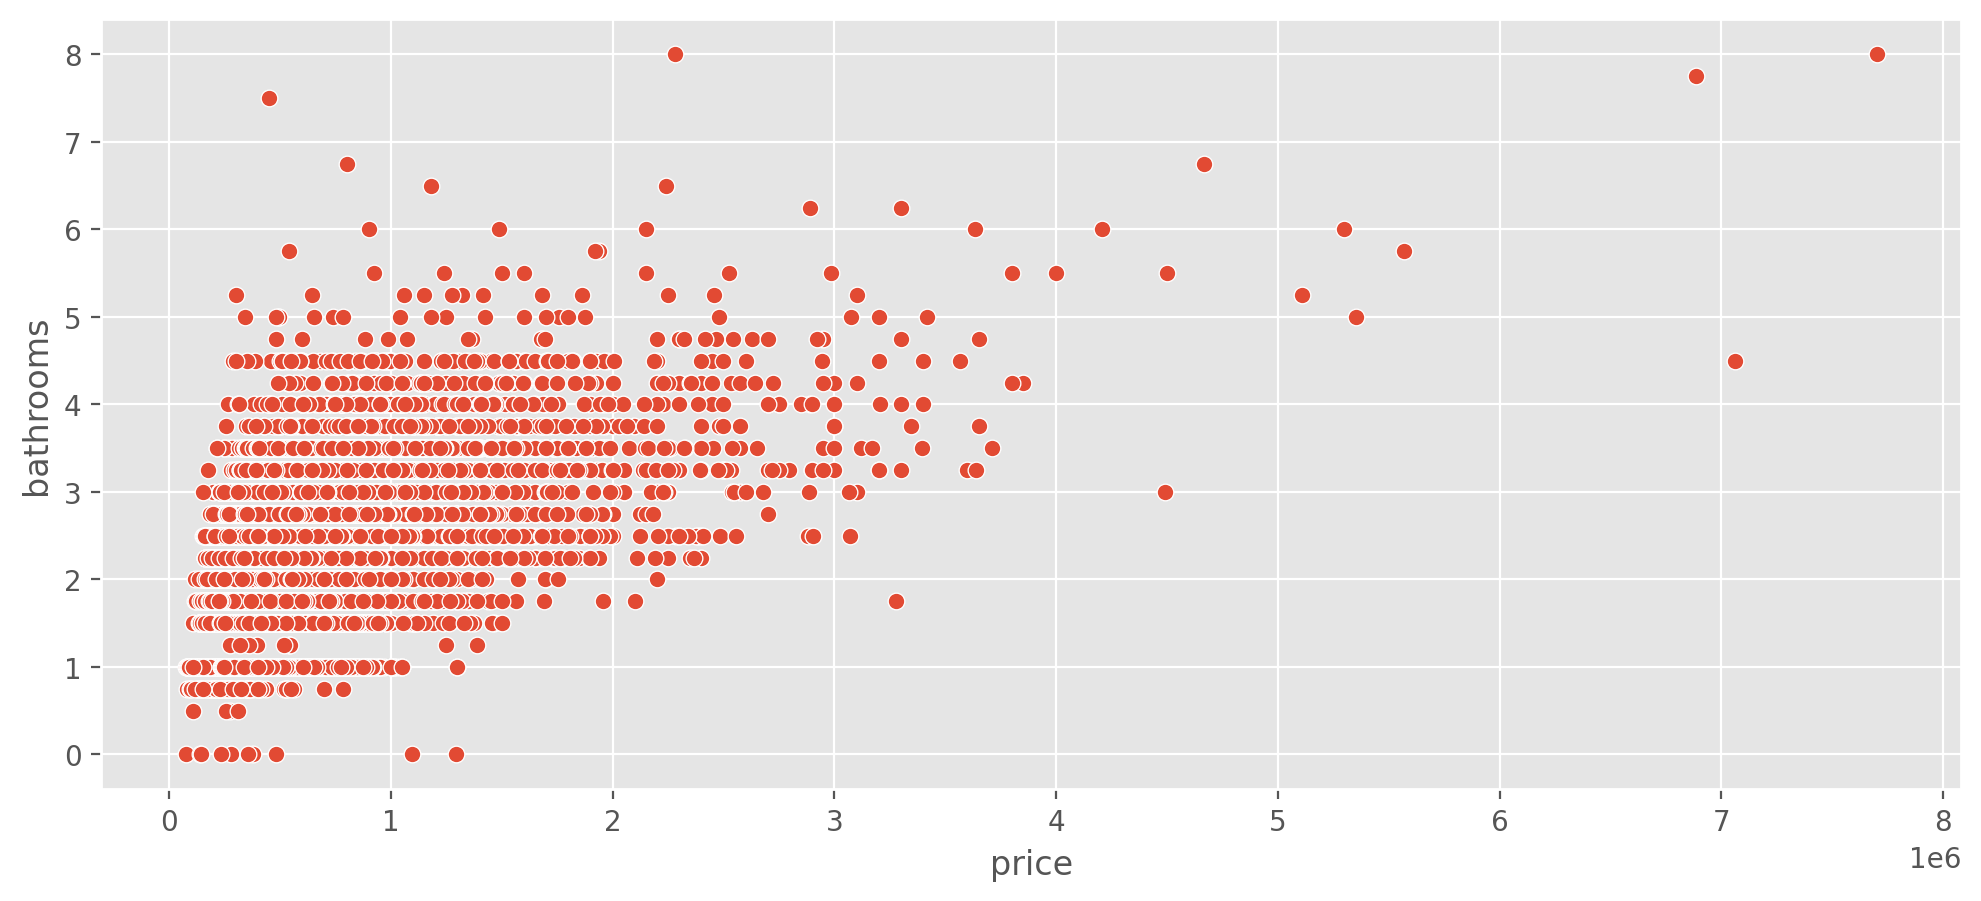

In [11]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data.price,data.bathrooms)

<AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>

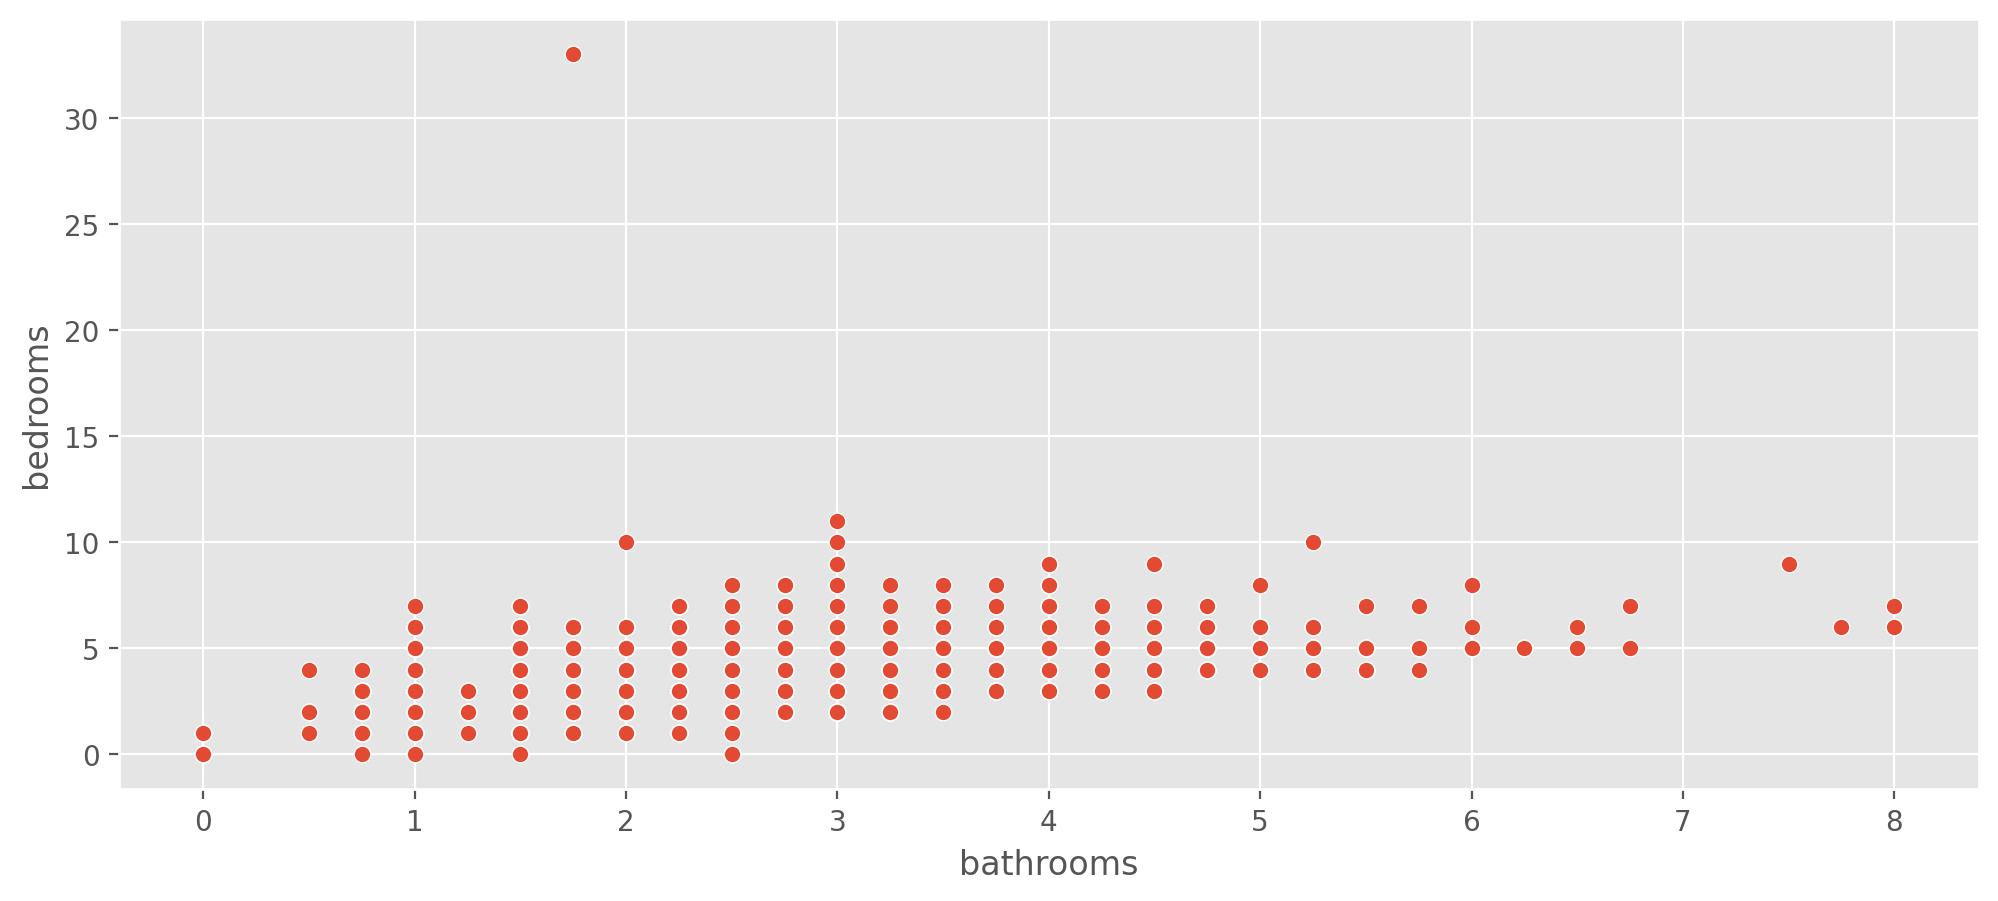

In [12]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data.bathrooms,data.bedrooms)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

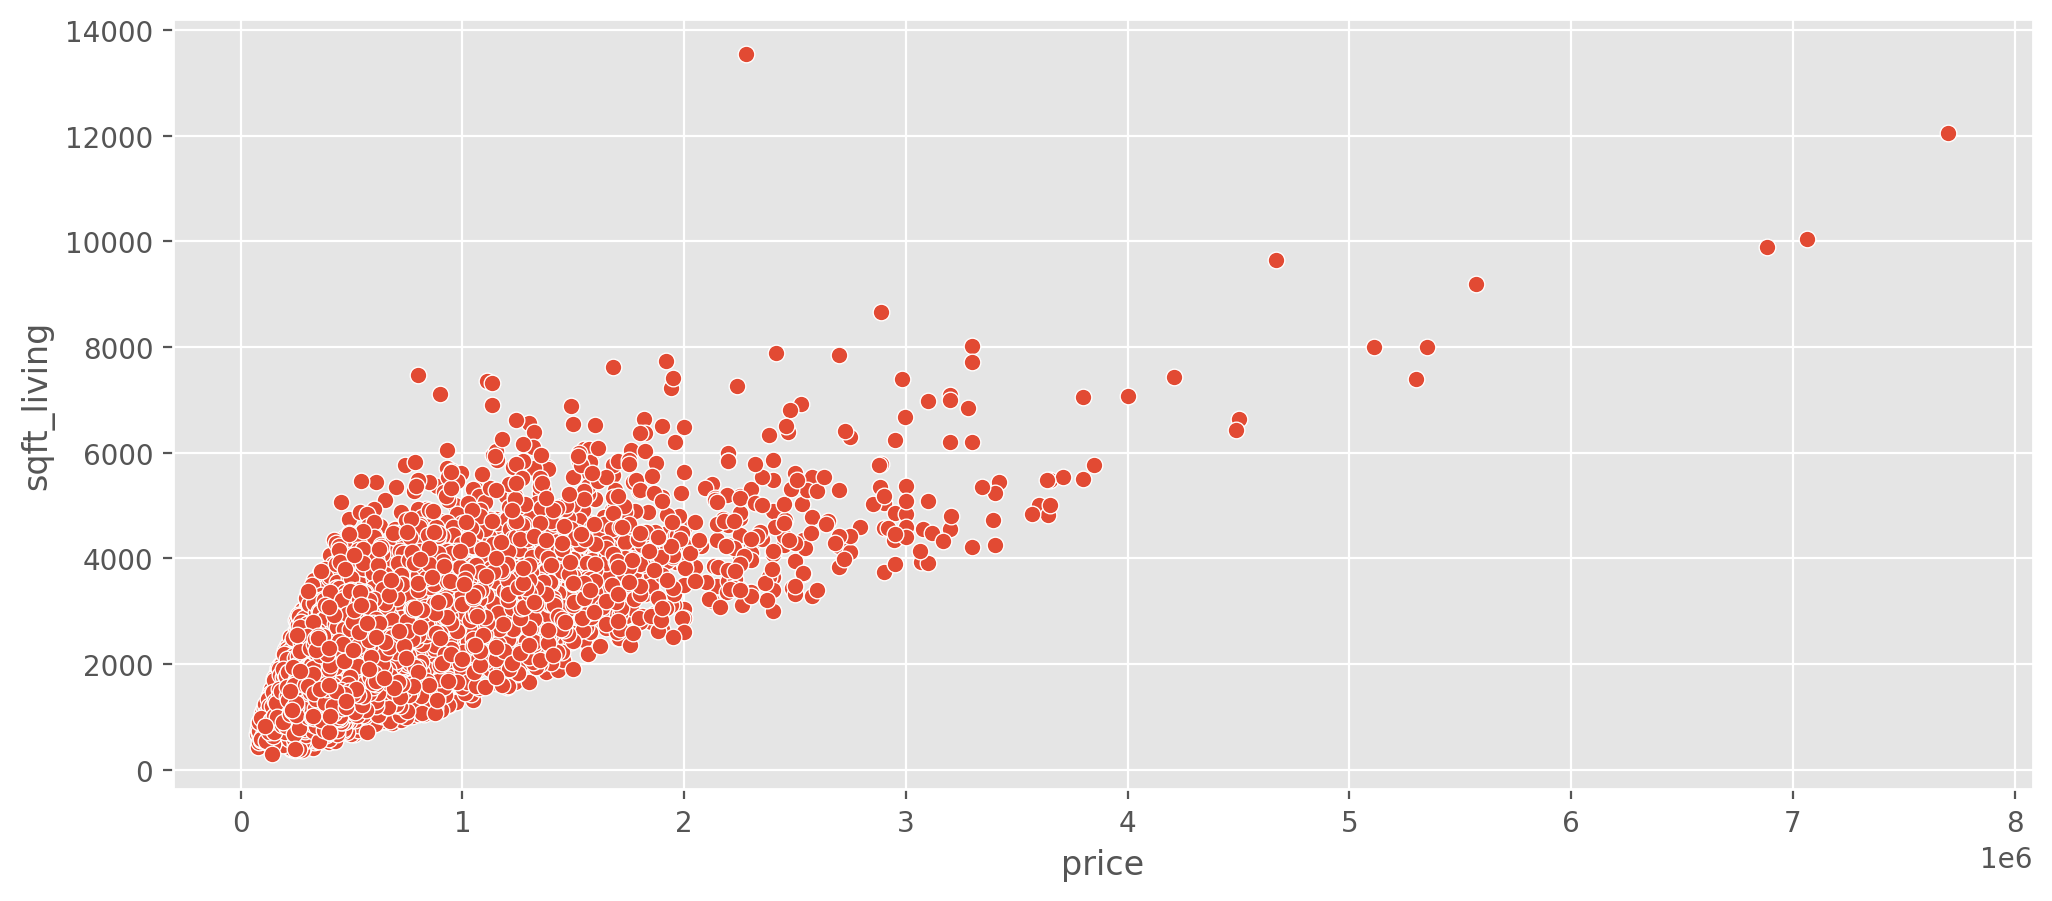

In [13]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data.price,data.sqft_living)

<AxesSubplot:>

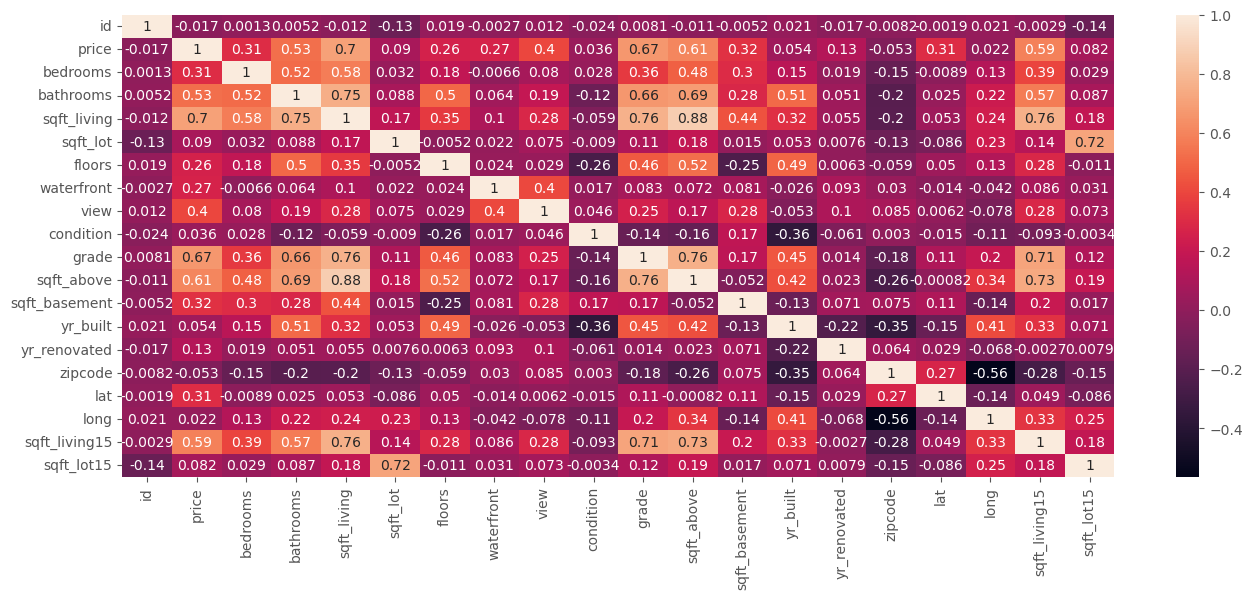

In [14]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='grade', ylabel='price'>

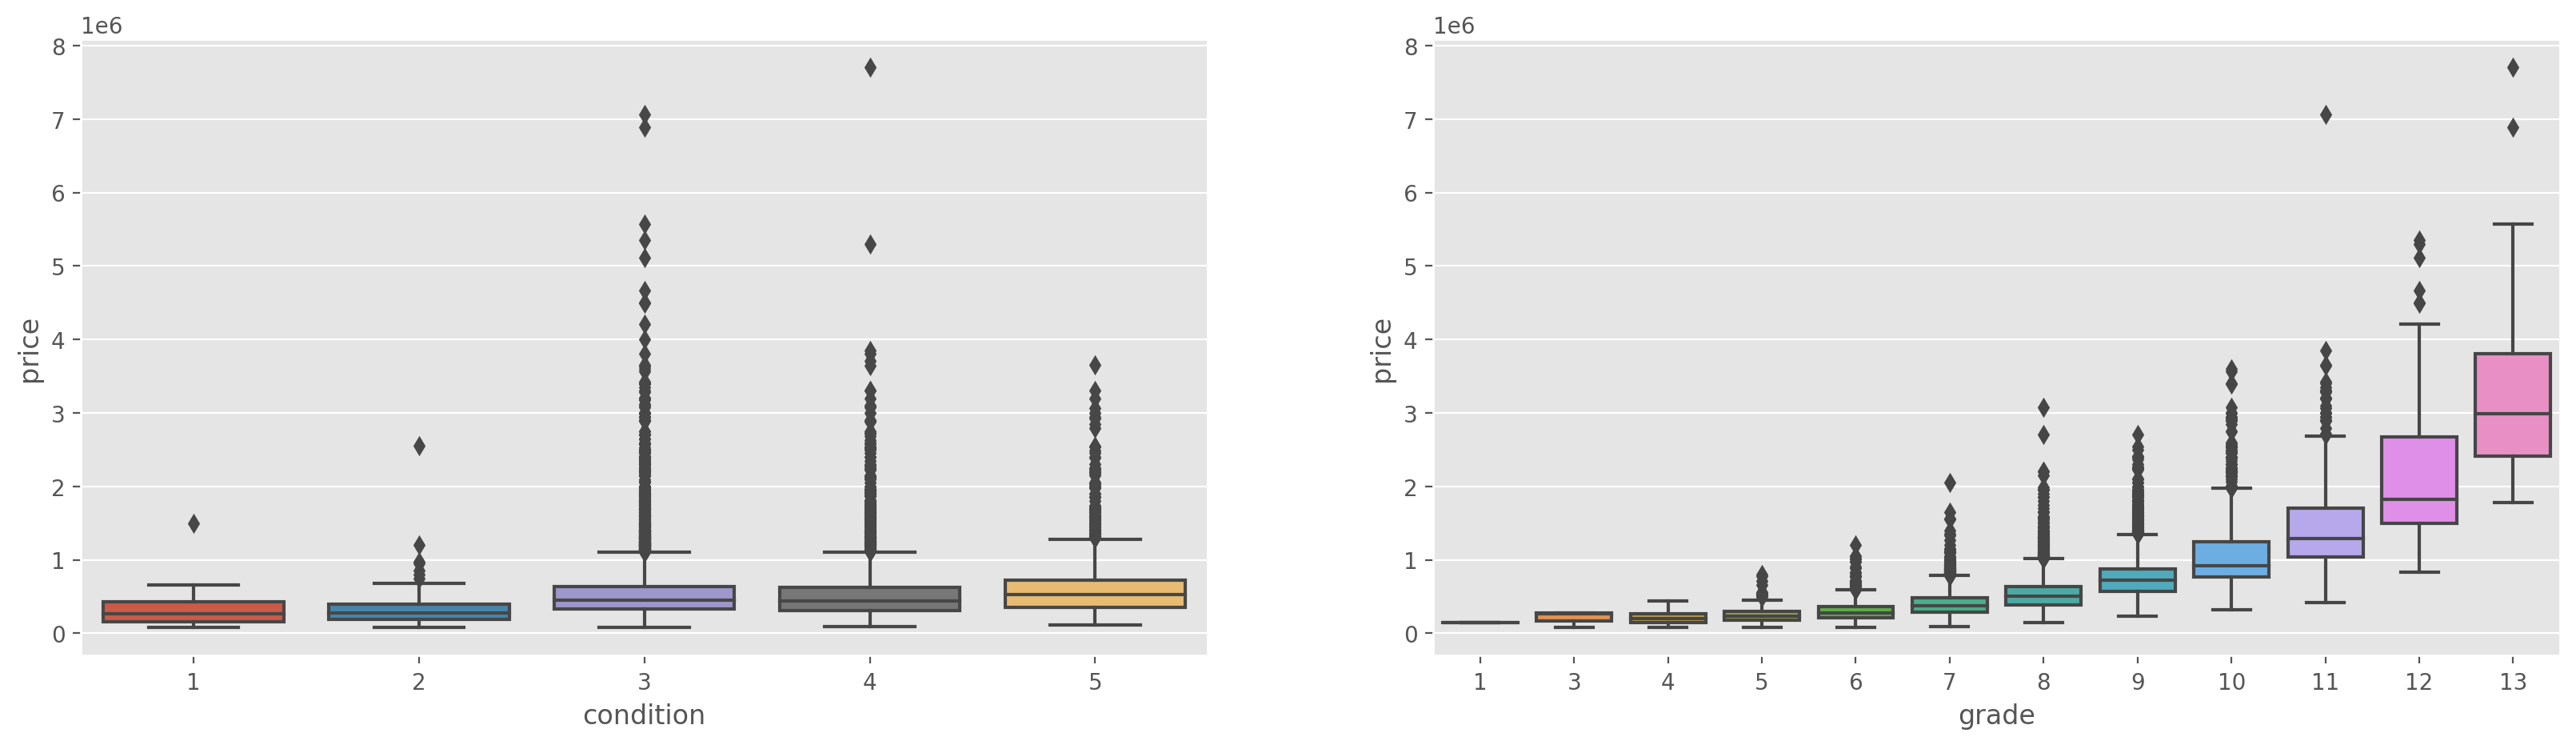

In [15]:
plt.figure(figsize=(20,5),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(data.condition,data.price)

plt.subplot(1,2,2)
sns.boxplot(data.grade,data.price)

### The price of the houses are mainly depend upon the square feet of the houses. The price also gets higher with the condition and grade.

In [16]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
# seperating independent and dependent features

cols = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","yr_built","yr_renovated","zipcode"]
X = data[cols]
Y = data[['price']]

In [18]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178
1,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125
2,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028
3,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136
4,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074


In [19]:
Y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [20]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Set Shape   : ', Y.shape)

Independent Feature Set Shape :  (21613, 12)
Dependent Feature Set Shape   :  (21613, 1)


## Data preprocessing

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ["sqft_living","sqft_lot","yr_built","yr_renovated"]
X[cols]=scaler.fit_transform(X[cols])
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,3,1.00,0.067170,0.003108,1.0,0,0,3,7,0.478261,0.000000,98178
1,3,2.25,0.172075,0.004072,2.0,0,0,3,7,0.443478,0.988089,98125
2,2,1.00,0.036226,0.005743,1.0,0,0,3,6,0.286957,0.000000,98028
3,4,3.00,0.126038,0.002714,1.0,0,0,5,7,0.565217,0.000000,98136
4,3,2.00,0.104906,0.004579,1.0,0,0,3,8,0.756522,0.000000,98074


In [22]:
# Splitting the dataset for training and testing.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [23]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing  Data Shape   : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (15129, 12)
Training Labels Shape :  (15129, 1)
Testing  Data Shape   :  (6484, 12)
Testing Labels Shape  :  (6484, 1)


## Applying various regression models

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.6511625202487891
Testing set score  :  0.6531664347204307


In [26]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(alpha = 0.001)
regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

In [27]:
print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  -2.0003475960224993e+23
Testing set score  :  -2.4321285576463287e+23


In [28]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha = 1)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.6511624991389526
Testing set score  :  0.653170681002048


In [29]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 1)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.6510149356070362
Testing set score  :  0.6537683504685761


In [30]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 15)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.7726943373863733
Testing set score  :  0.7621412285283585


In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 4)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.6492720214639649
Testing set score  :  0.5626502912939718


In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, max_depth = 6)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.7686524843682854
Testing set score  :  0.6882393660518015


In [33]:
from lightgbm import LGBMRegressor
regressor = LGBMRegressor(n_estimators = 50)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 12
[LightGBM] [Info] Start training from score 543286.477890
Training set score :  0.8821821638123708
Testing set score  :  0.8311765903647415


In [34]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 25)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.9230884574432858
Testing set score  :  0.8151497267997719


In [35]:
estimator = DecisionTreeRegressor(max_depth = 6)

from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(estimator, n_estimators = 25)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.7858320090759857
Testing set score  :  0.6475130085236466


In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [37]:
knn_Regressor   = KNeighborsRegressor(n_neighbors = 5)
dt_Regressor    = DecisionTreeRegressor(max_depth = 8)
rf_Regressor    = RandomForestRegressor(n_estimators = 25, max_depth = 6)
xgb_Regressor   = XGBRegressor(n_estimators = 30 )
lgbm_Regressor  = LGBMRegressor(n_estimators = 50)

In [38]:
est = [('knn', knn_Regressor),('dt', dt_Regressor), ('rf', rf_Regressor),('xgb', xgb_Regressor),('lgbm', lgbm_Regressor)]

In [39]:
from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor(estimators = est)

regressor.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 12
[LightGBM] [Info] Start training from score 543286.477890


VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor(max_depth=8)),
                            ('rf',
                             RandomForestRegressor(max_depth=6,
                                                   n_estimators=25)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metr...
                                          importance_type=None,
                                          interaction_constraints=None,
       

In [40]:
from sklearn.metrics import r2_score
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

print('Training Set Accuracy : ', r2_score(y_train, pred_train))
print('Testing Set Accuracy  : ', r2_score(y_test, pred_test))



Training Set Accuracy :  0.892644229985608
Testing Set Accuracy  :  0.8170484564046996


## =======================================================================
## Report

### In this project we trained the model using several regression models to predict the housing costs. We used the ensembled methods like bagging, boosting and stacking also. 

### The score given by all the models are:

1. LinearRegression
    - Training set score :  0.6490486039628527
    - Testing set score  :  0.6579606949930936
2. SGDRegressor
    - Training set score :  0.6137953230257464
    - Testing set score  :  0.6196001003639703
3. Lasso
    - Training set score :  0.6490485812062279
    - Testing set score  :  0.6579573275109565
4. Ridge
    - Training set score :  0.6489054236321299
    - Testing set score  :  0.6575064035487654
5. KNeighborsRegressor
    - Training set score :  0.7105976978530093
    - Testing set score  :  0.6707847984235765
6. DecisionTreeRegressor
    - Training set score :  0.6306326162989289
    - Testing set score  :  0.6075137507095192
7. RandomForestRegressor
    - Training set score :  0.7551414268140153
    - Testing set score  :  0.7102052045963733
8. LGBMRegressor
    - Training set score :  0.8783127986992355
    - Testing set score  :  0.8418014483760116
9. XGBRegressor
    - Training set score :  0.9162078225289914
    - Testing set score  :  0.8364495640260275
10. AdaBoostRegressor
    - Training set score :  0.774428364827946
    - Testing set score  :  0.7169100690697863
11. VotingRegressor
    - Training Set Accuracy :  0.8676945898665609
    - Testing Set Accuracy  :  0.7981578835037952

### All the individual models gave poor performance on the training and testing data.
### Only the ensemble methods gave better prediction of housing prices with more than 75% in each cases.